In [4]:
from google.colab import files
uploaded = files.upload()

Saving Final_Cleaned_Crime_Dataset Anabel Aguilar.csv to Final_Cleaned_Crime_Dataset Anabel Aguilar (1).csv


Training Logistic Regression...
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       659
           1       0.92      0.80      0.86      1841
           2       0.69      0.66      0.67      2445
           3       0.61      0.48      0.54      4559
           4       0.42      0.68      0.52       895
           5       0.32      0.56      0.41       254
           6       0.79      0.86      0.82      6543

    accuracy                           0.71     17196
   macro avg       0.66      0.71      0.67     17196
weighted avg       0.72      0.71      0.71     17196

--------------------------------------------------------------------------------


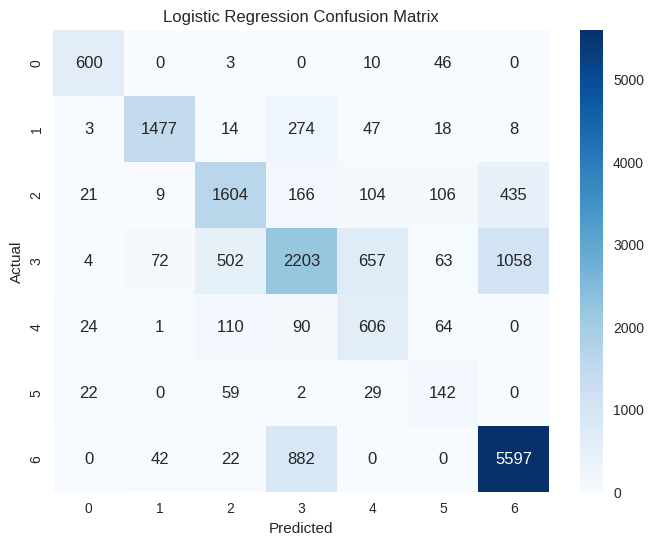

Training MLP...
MLP Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       659
           1       1.00      1.00      1.00      1841
           2       0.93      0.93      0.93      2445
           3       0.99      1.00      0.99      4559
           4       0.91      0.86      0.88       895
           5       0.78      0.81      0.79       254
           6       0.99      0.99      0.99      6543

    accuracy                           0.98     17196
   macro avg       0.94      0.94      0.94     17196
weighted avg       0.98      0.98      0.98     17196

MLP Log Loss: 0.1115
--------------------------------------------------------------------------------


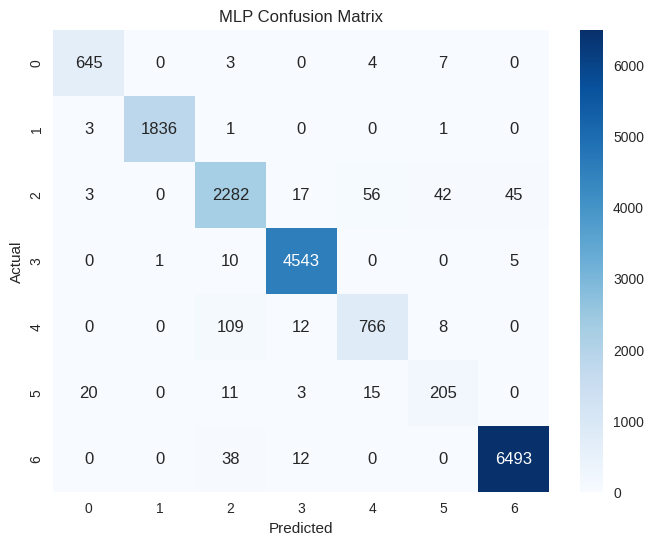

Training Decision Tree...
Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       659
           1       1.00      1.00      1.00      1841
           2       0.74      0.87      0.80      2445
           3       1.00      0.84      0.92      4559
           4       0.88      1.00      0.94       895
           5       0.80      0.97      0.88       254
           6       0.98      0.99      0.99      6543

    accuracy                           0.94     17196
   macro avg       0.91      0.95      0.93     17196
weighted avg       0.95      0.94      0.94     17196

--------------------------------------------------------------------------------


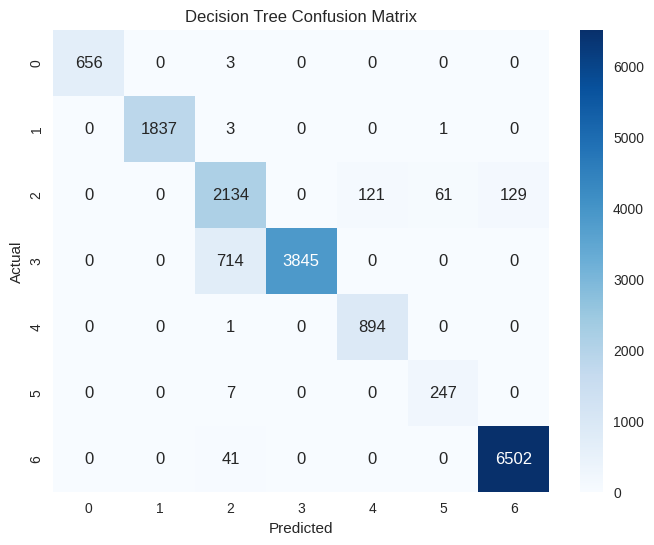

Training Random Forest...
Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       659
           1       0.96      0.99      0.98      1841
           2       0.93      0.80      0.86      2445
           3       1.00      0.94      0.97      4559
           4       0.92      0.88      0.90       895
           5       0.78      0.97      0.87       254
           6       0.92      0.99      0.96      6543

    accuracy                           0.94     17196
   macro avg       0.91      0.93      0.92     17196
weighted avg       0.94      0.94      0.94     17196

--------------------------------------------------------------------------------


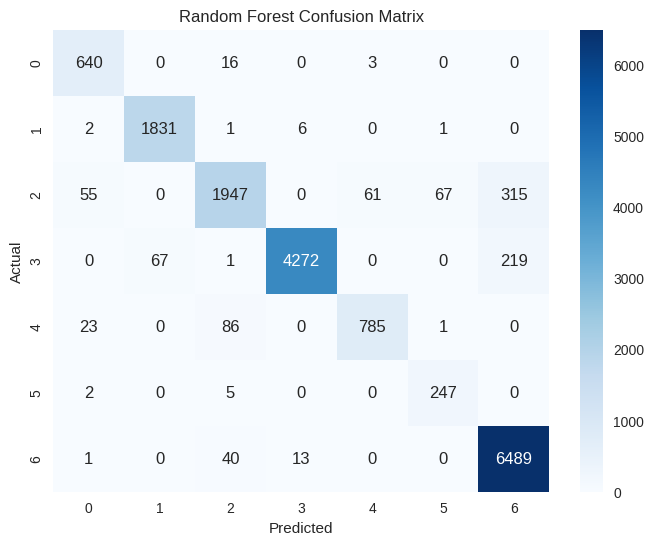

Training KNN...
KNN Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       659
           1       0.98      0.97      0.98      1841
           2       0.92      0.88      0.90      2445
           3       0.95      0.97      0.96      4559
           4       0.89      0.80      0.84       895
           5       0.79      0.71      0.75       254
           6       0.96      0.99      0.98      6543

    accuracy                           0.95     17196
   macro avg       0.92      0.90      0.91     17196
weighted avg       0.95      0.95      0.95     17196

--------------------------------------------------------------------------------


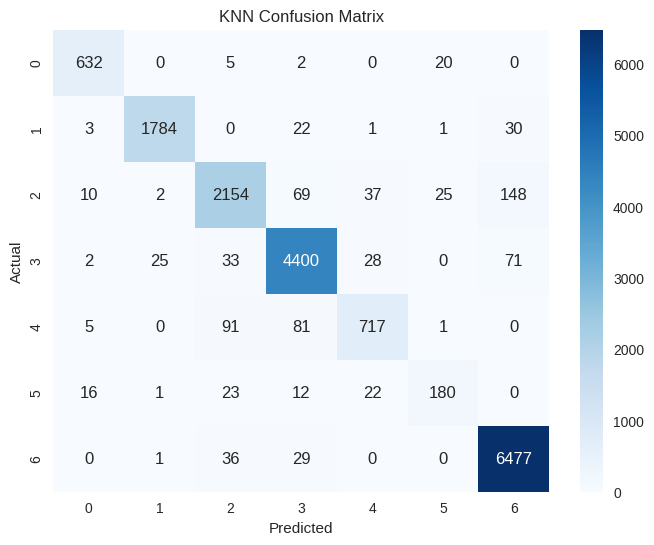

Training SVM...
SVM Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       659
           1       0.94      0.99      0.96      1841
           2       0.84      0.75      0.79      2445
           3       0.92      0.87      0.89      4559
           4       0.76      0.63      0.69       895
           5       0.75      0.65      0.70       254
           6       0.90      0.99      0.94      6543

    accuracy                           0.90     17196
   macro avg       0.87      0.83      0.85     17196
weighted avg       0.89      0.90      0.89     17196

SVM Log Loss: 0.2965
--------------------------------------------------------------------------------


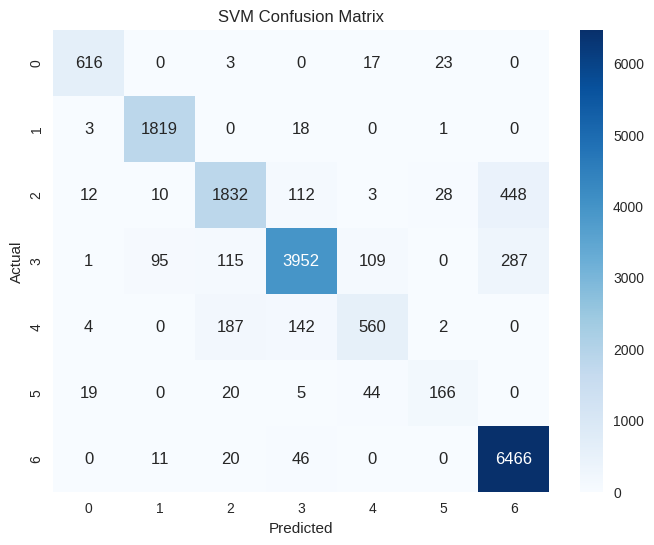

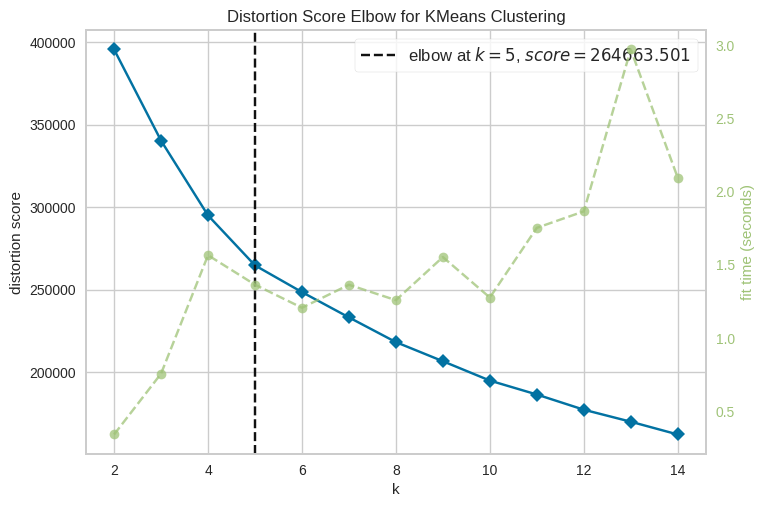

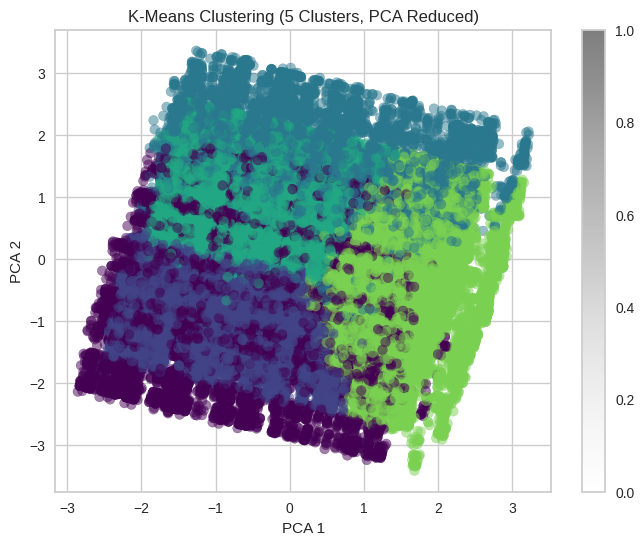

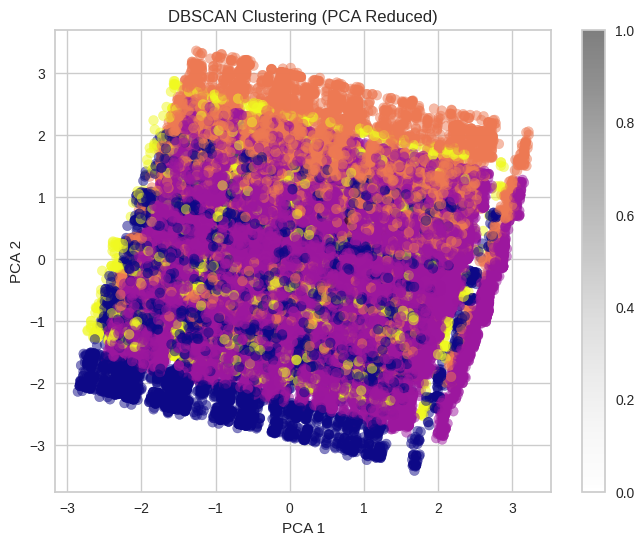

K-Means Silhouette Score (5 Clusters): 0.2007
DBSCAN Silhouette Score: 0.2335


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Loading dataset
file_path = "Final_Cleaned_Crime_Dataset Anabel Aguilar.csv"
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['CATEGORY'])
y = df['CATEGORY']

# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomial transformation for logistic regression
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', C=0.5, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=300, learning_rate='adaptive', alpha=0.05, random_state=42, early_stopping=True, validation_fraction=0.1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=15, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=6, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=11, weights='distance'),
    "SVM": SVC(kernel='rbf', C=1, probability=True, random_state=42)
}

# Training and evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    if name == "Logistic Regression":
        model.fit(X_train_poly, y_train)
        preds = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print(f"{name} Report:")
    print(classification_report(y_test, preds))
    if name in ["MLP", "SVM"]:
        print(f"{name} Log Loss: {log_loss(y_test, model.predict_proba(X_test)):.4f}")
    print("-" * 80)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Finding best K for K-Means
kmeans_model = KMeans(random_state=42, n_init=10)
k_visualizer = KElbowVisualizer(kmeans_model, k=(2, 15))
k_visualizer.fit(X_train)
k_visualizer.show()
k_optimal = k_visualizer.elbow_value_

# K-Means Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_train)

# K-Means Visualization
plt.figure(figsize=(8,6))
kmeans_colors = plt.cm.viridis(kmeans_clusters / k_optimal)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_colors, alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"K-Means Clustering ({k_optimal} Clusters, PCA Reduced)")
plt.colorbar()
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_train)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# DBSCAN Plot
plt.figure(figsize=(8,6))
colors = np.array([plt.cm.plasma(i / max(dbscan_clusters)) if i != -1 else (0, 0, 0, 1) for i in dbscan_clusters])
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.colorbar()
plt.show()

# Silhouette Scores
print(f"K-Means Silhouette Score ({k_optimal} Clusters): {silhouette_score(X_train, kmeans_clusters):.4f}")
if len(set(dbscan_clusters)) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(X_train[dbscan_clusters!=-1], dbscan_clusters[dbscan_clusters!=-1]):.4f}")
else:
    print("DBSCAN did not form valid clusters.")
